# Hierarchical Clustering


## 1. Create a dendrogram to find the optimal number of clusters
- once for the rudamentary features and once with the additional ones


In [99]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import hierarchicalClustering_functions as hcf
import pandas as pd
import numpy as np
import df_manipulation_functions as dfmf

#read oin the flow features
basic_features_flow = pd.read_pickle('Flow_Features/basic_features_flow.pkl')
additional_features_flow = pd.read_pickle('Flow_Features/additional_features_flow.pkl')
all_features_flow = pd.read_pickle('Flow_Features/all_features_flow.pkl')

basic_features_normalized_flow = dfmf.normalize_data(basic_features_flow)
additional_features_normalized_flow = dfmf.normalize_data(additional_features_flow)
all_features_normalized_flow = dfmf.normalize_data(all_features_flow)

#read oin the flow features 
basic_features_temp = pd.read_pickle('Temp_Features/basic_features_temp.pkl')
additional_features_temp = pd.read_pickle('Temp_Features/additional_features_temp.pkl')
all_features_temp = pd.read_pickle('Temp_Features/all_features_temp.pkl')

basic_features_normalized_temp = dfmf.normalize_data(basic_features_temp)
additional_features_normalized_temp = dfmf.normalize_data(additional_features_temp)
all_features_normalized_temp = dfmf.normalize_data(all_features_temp)

#merge the temp and flow data
basic_normalized_all_df = pd.merge(basic_features_normalized_temp, basic_features_normalized_flow, on=['Stationsnummer'])
additional_normalized_all_df = pd.merge(additional_features_normalized_temp, additional_features_normalized_flow, on=['Stationsnummer'])
all_normalized_all_df = pd.merge(all_features_normalized_temp, all_features_normalized_flow, on=['Stationsnummer'])

all_features = pd.merge(all_features_temp, all_features_flow, on=['Stationsnummer'])

lower_bound = 2
num_clusters = 70

#create df with Stationsnummer as column and fill it with statinsnummer from all_features_all
cluster_labels_hierachical_basic = all_features['Stationsnummer'].copy()

cluster_labels_hierachical_basic.head()
cluster_labels_hierachical_basic, cluster_scores_hierachical_basic = hcf.hierarchical_clustering(all_features, basic_normalized_all_df, lower_bound, num_clusters)
cluster_labels_hierachical_additional, cluster_scores_hierachical_additional = hcf.hierarchical_clustering(all_features, additional_normalized_all_df, lower_bound, num_clusters)

cluster_labels_hierachical_all, cluster_scores_hierachical_all = hcf.hierarchical_clustering(all_features, all_normalized_all_df, lower_bound, num_clusters)

#save the cluster labels to a csv file in the current directory
cluster_labels_hierachical_basic.to_csv('Labels/Hierarchical/cluster_labels_hierarchical_basic_both.csv')
#save the cluster scores to a csv file
cluster_scores_hierachical_basic.to_csv('Scores/Hierarchical/cluster_scores_hierarchical_basic_both.csv')

#save the cluster labels to a csv file in the current directory
cluster_labels_hierachical_additional.to_csv('Labels/Hierarchical/cluster_labels_hierarchical_additional_both.csv')
#save the cluster scores to a csv file
cluster_scores_hierachical_additional.to_csv('Scores/Hierarchical/cluster_scores_hierarchical_additional_both.csv')

#save the cluster labels to a csv file
cluster_labels_hierachical_all.to_csv('Labels/Hierarchical/cluster_labels_hierarchical_all_both.csv')
#save the cluster scores to a csv file
cluster_scores_hierachical_all.to_csv('Scores/Hierarchical/cluster_scores_hierarchical_all_both.csv')

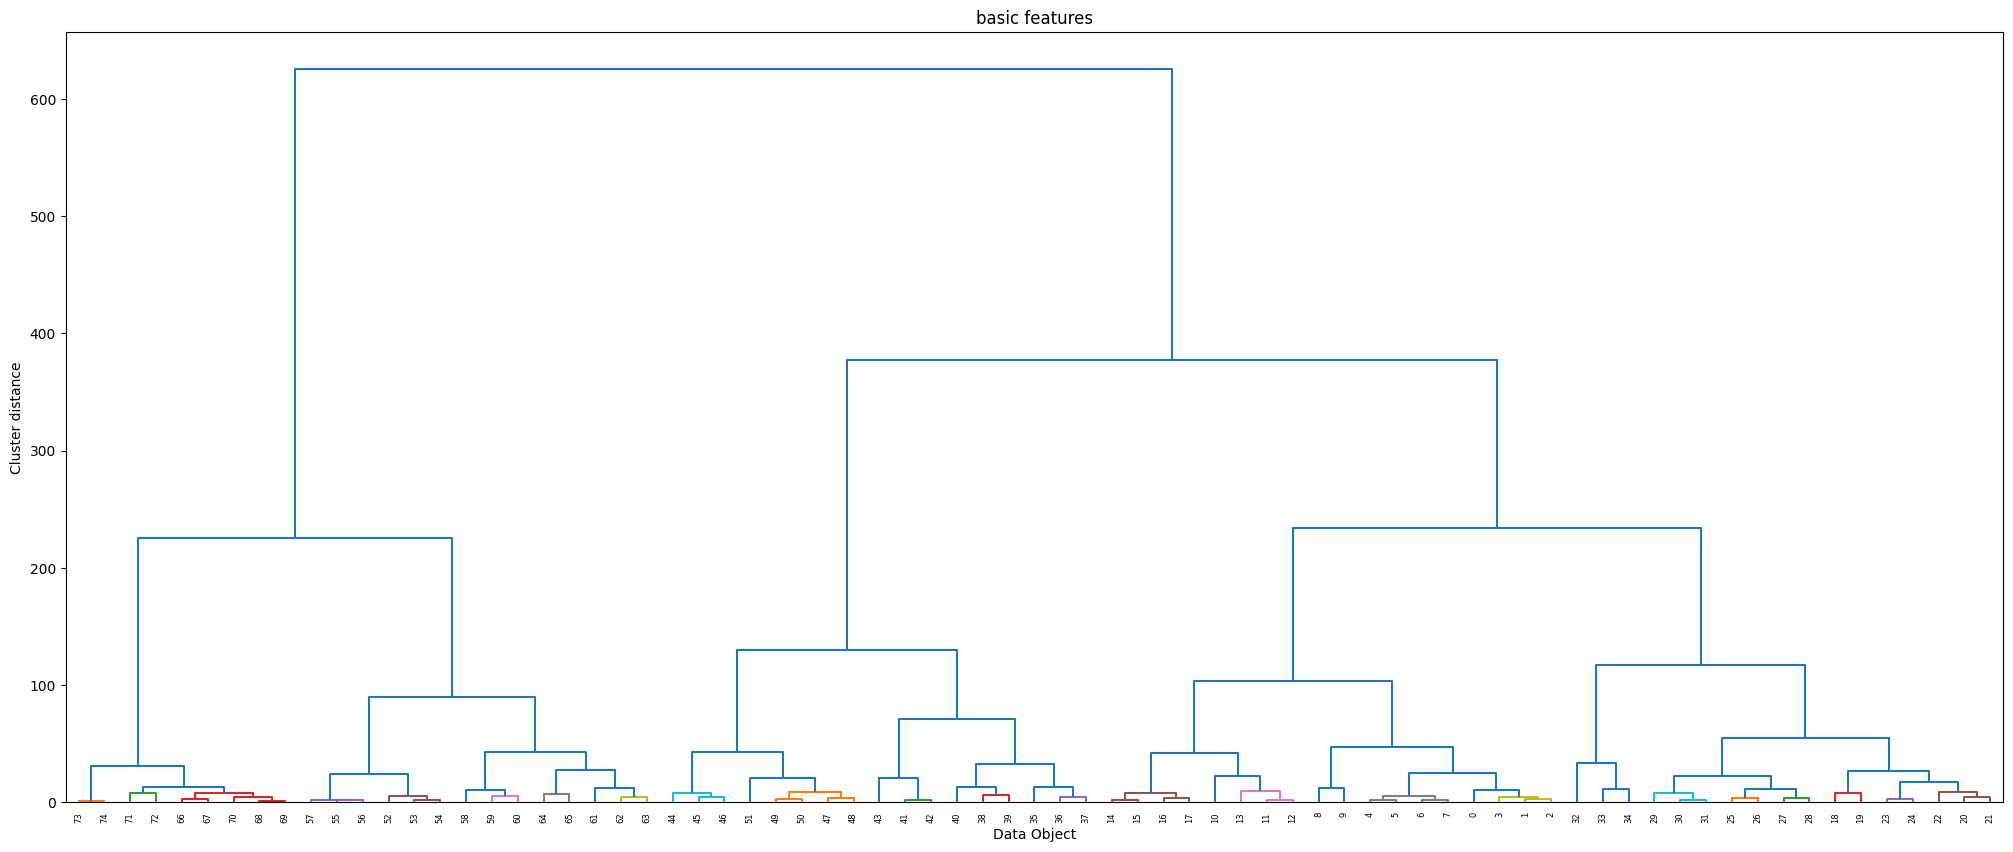

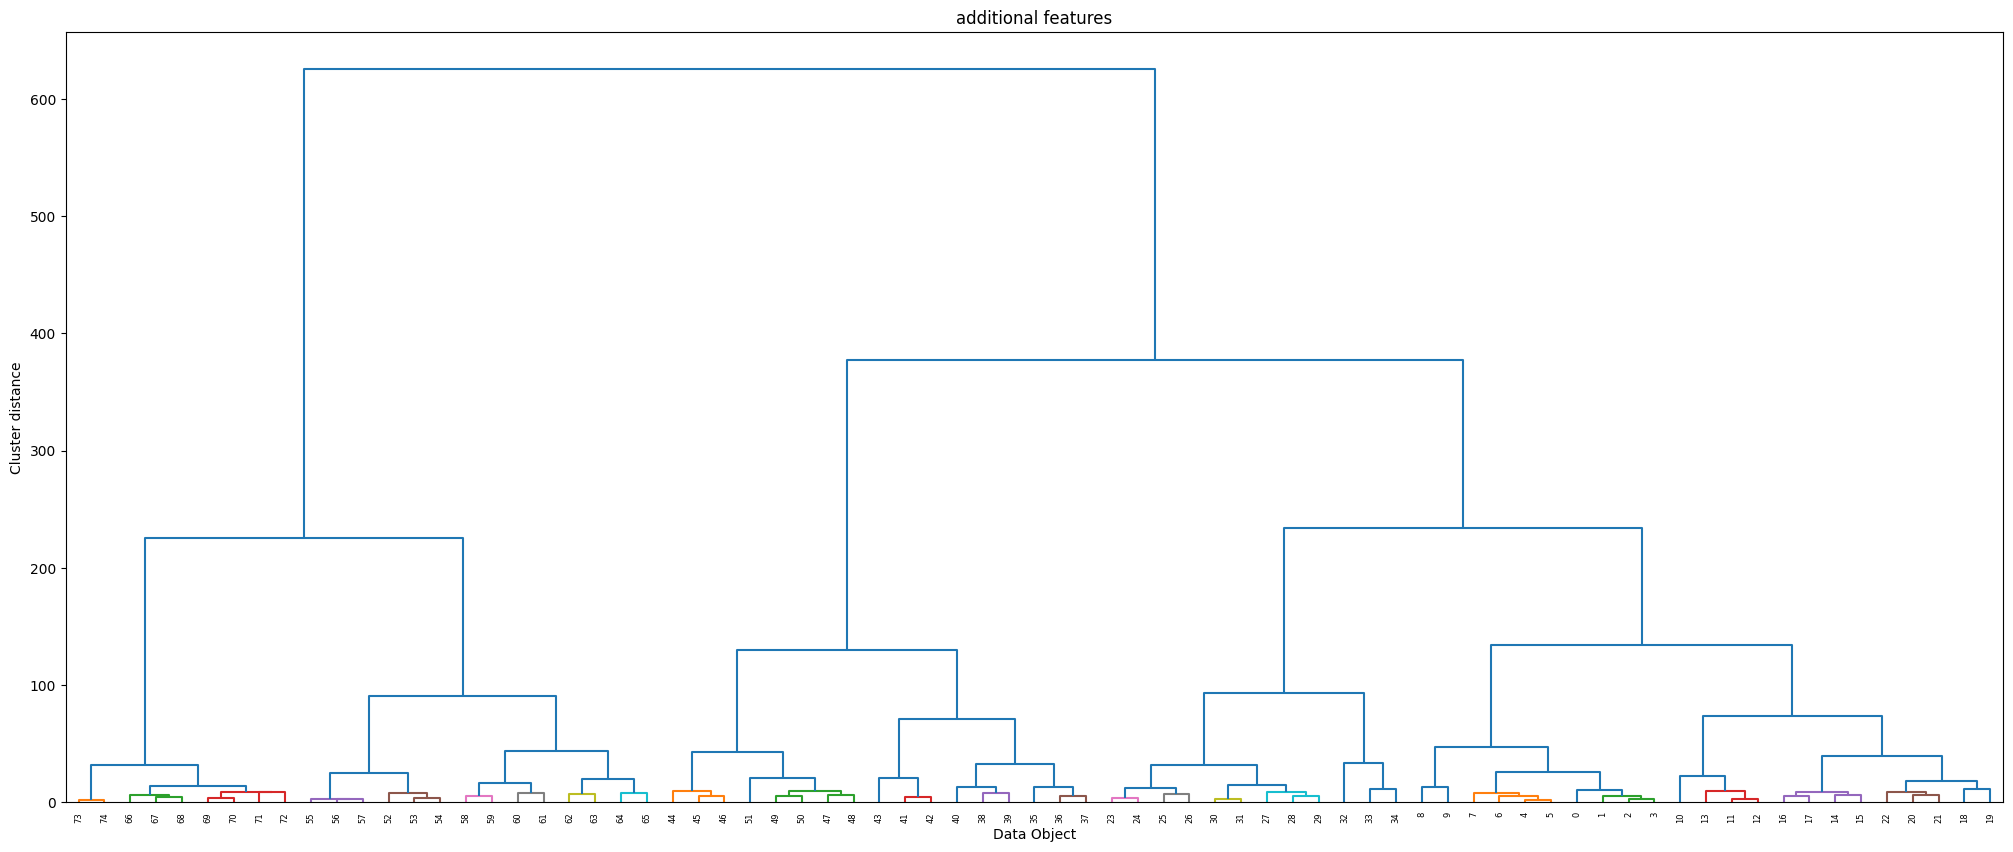

In [100]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import single, complete

#create two dendrograms one for the basic features and one for the additional features

linkage_array = complete(basic_normalized_all_df)
plt.figure(figsize=(25, 10))
dendrogram(linkage_array, color_threshold=10.0)
plt.title("basic features")
plt.xlabel("Data Object")
plt.ylabel("Cluster distance")
plt.show()

linkage_array = complete(all_normalized_all_df)
plt.figure(figsize=(25, 10))
dendrogram(linkage_array, color_threshold=10.0)
plt.title("additional features")
plt.xlabel("Data Object")
plt.ylabel("Cluster distance")
plt.show()

## Result:

- one can clearly see that between the rudimentary features and the additional ones there is a not a real difference in the clustering


2. Plot the clusters on mds plots 
- once for the rudamentary features and once with the additional ones


c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


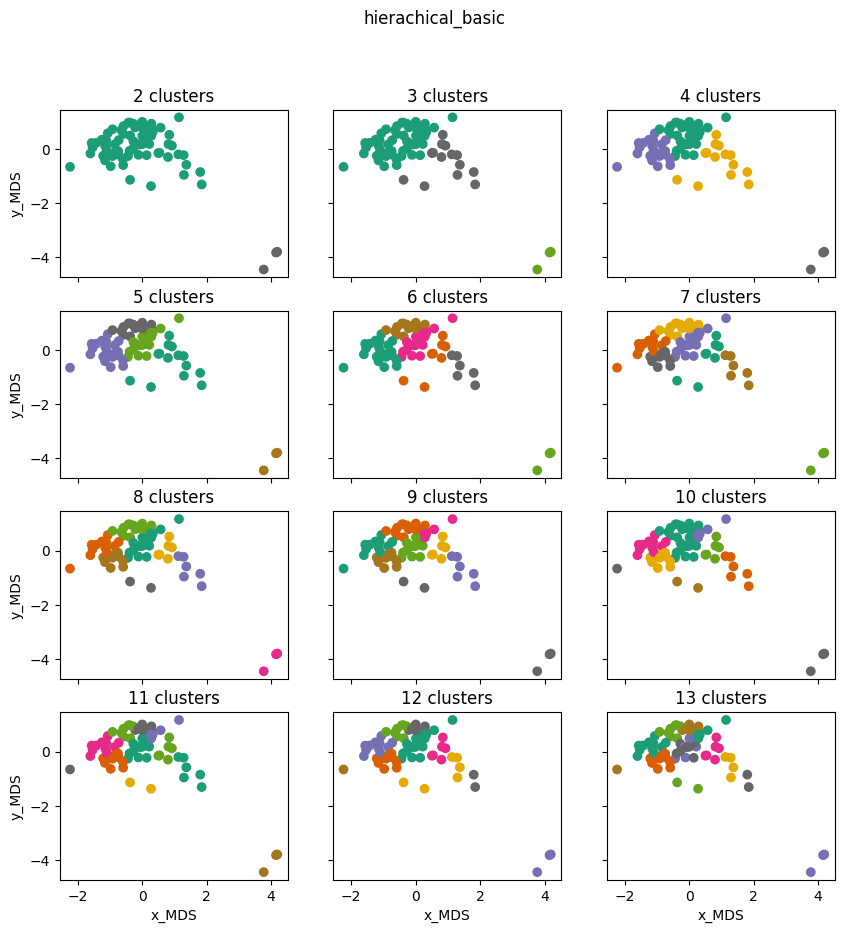

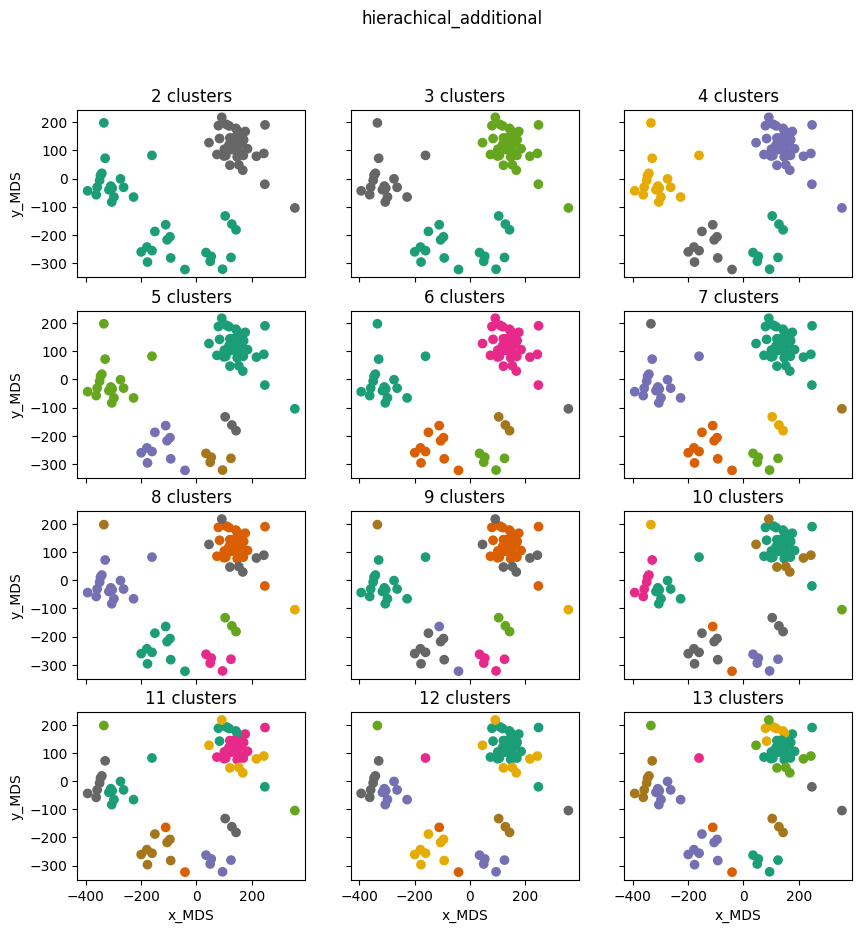

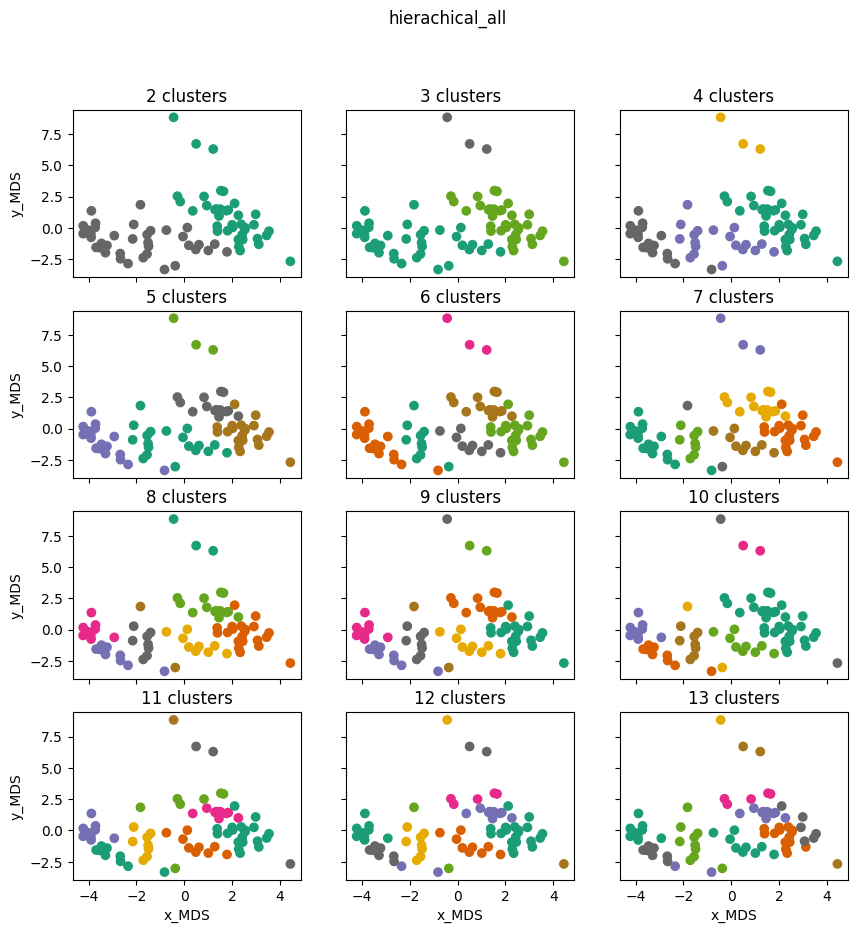

In [101]:
import math as math
import df_manipulation_functions as dfmf



#create mds data for all features
all_mds_all_df = dfmf.create_mds_represntation(all_normalized_all_df)

#create mds data for basic features
basic_mds_all_df = dfmf.create_mds_represntation(basic_normalized_all_df)
additional_mds_all_df = dfmf.create_mds_represntation(additional_normalized_all_df)

def plot_clusters(number_of_plots, num_columns, lower_bound, mds_representation, cluster_labels, name):
    # plot the clusters
    num_rows = math.ceil(number_of_plots/num_columns) 
    j = 0
    i = 0

    current_cluster = lower_bound
   


    fig, axs = plt.subplots(num_rows, num_columns)
    fig.set_size_inches(10, 10)
    fig.suptitle(name)
    while current_cluster < number_of_plots + lower_bound:
        axs[j,i].scatter(mds_representation['x_MDS'] , mds_representation['y_MDS'], c=cluster_labels[str(current_cluster) + ' clusters'], cmap='Dark2')
        axs[j,i].set_title(str(current_cluster) + ' clusters')
        #set the height of the subplots to be the same as the width
        #axs[j,i].set_aspect('equal')
        i = i+1
        if(i % 3 ==0):
            j = j+1
            i = 0
        current_cluster = current_cluster + 1

    for ax in axs.flat:
        ax.set(xlabel='x_MDS', ylabel='y_MDS')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()


plot_clusters(12,3,2, basic_mds_all_df, cluster_labels_hierachical_basic,  'hierachical_basic')
plot_clusters(12,3,2, additional_mds_all_df, cluster_labels_hierachical_additional,  'hierachical_additional')
plot_clusters(12,3,2, all_mds_all_df, cluster_labels_hierachical_all, 'hierachical_all')


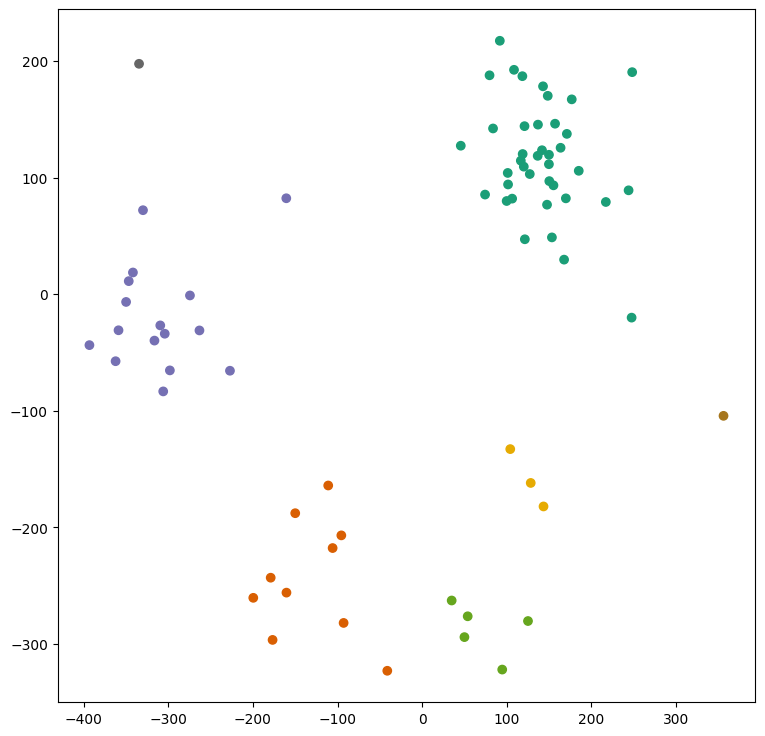

In [102]:
#plot kmeans flow basic with 4 clusters mds data
plt.figure(figsize=(9,9))
plt.scatter(additional_mds_all_df['x_MDS'] , additional_mds_all_df['y_MDS'], c=cluster_labels_hierachical_additional[str(7) + ' clusters'], cmap='Dark2')

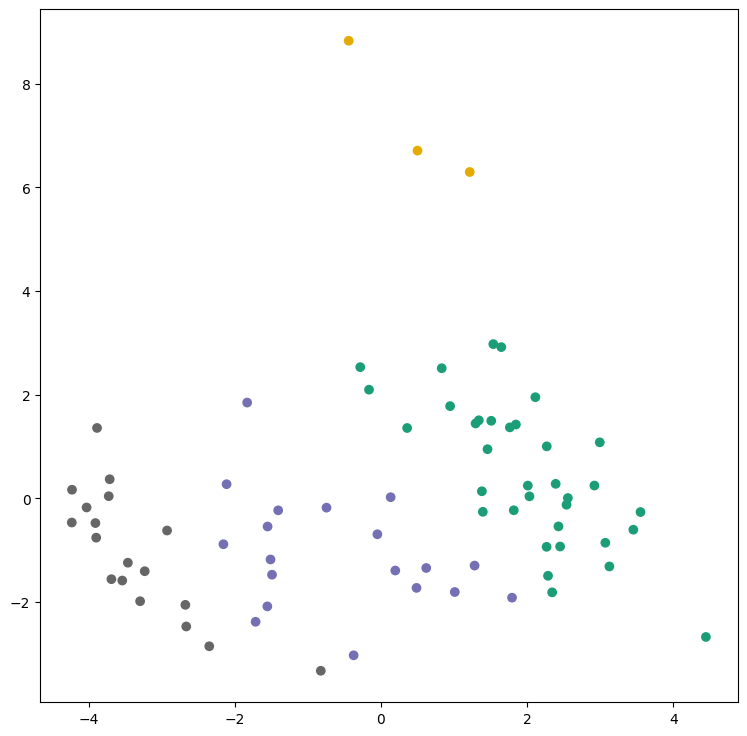

In [111]:
#plot kmeans flow basic with 4 clusters mds data
plt.figure(figsize=(9,9))
plt.scatter(all_mds_all_df['x_MDS'] , all_mds_all_df['y_MDS'], c=cluster_labels_hierachical_all[str(4) + ' clusters'], cmap='Dark2')

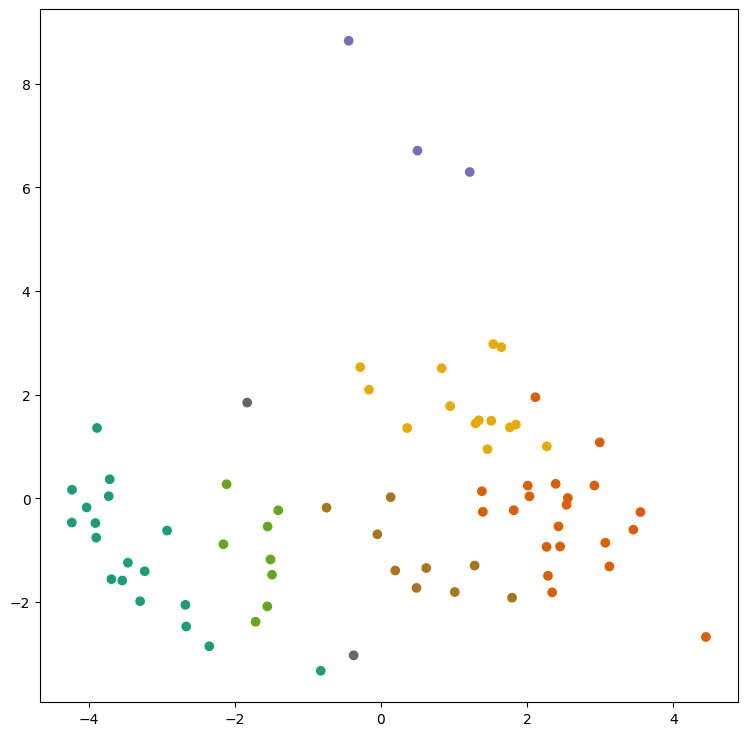

In [112]:
#plot kmeans flow basic with 4 clusters mds data
plt.figure(figsize=(9,9))
plt.scatter(all_mds_all_df['x_MDS'] , all_mds_all_df['y_MDS'], c=cluster_labels_hierachical_all[str(7) + ' clusters'], cmap='Dark2')

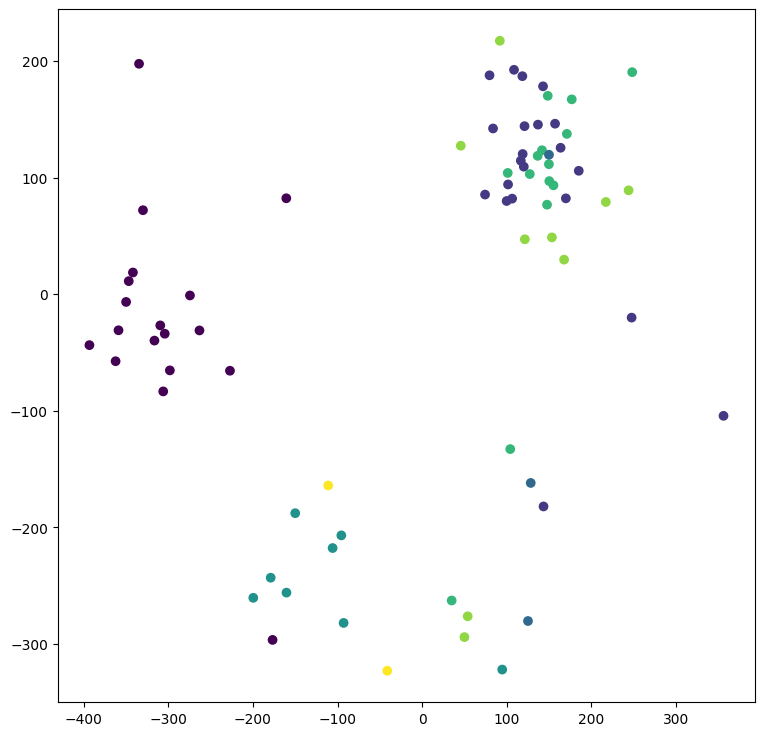

In [105]:
#plot kmeans flow basic with 4 clusters mds data
plt.figure(figsize=(9,9))
plt.scatter(additional_mds_all_df['x_MDS'] , additional_mds_all_df['y_MDS'], c=cluster_labels_hierachical_all[str(7) + ' clusters'])

## 3. Evaluate the calculated metrics
- once for the rudamentary features and once with the additional ones

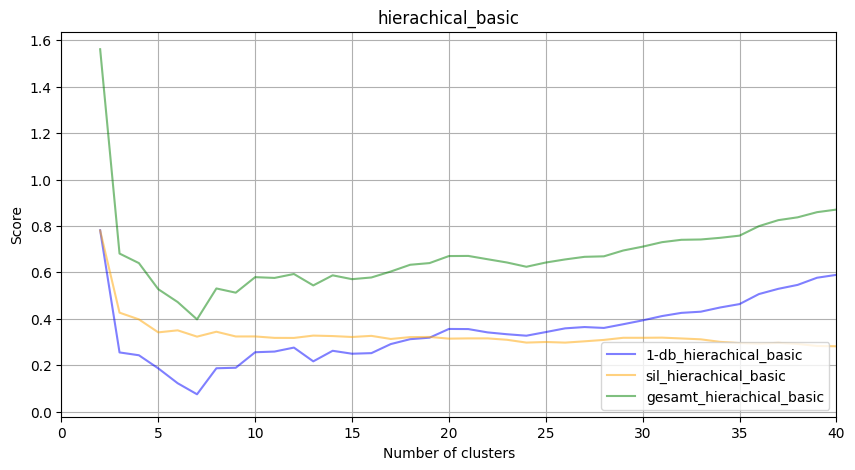

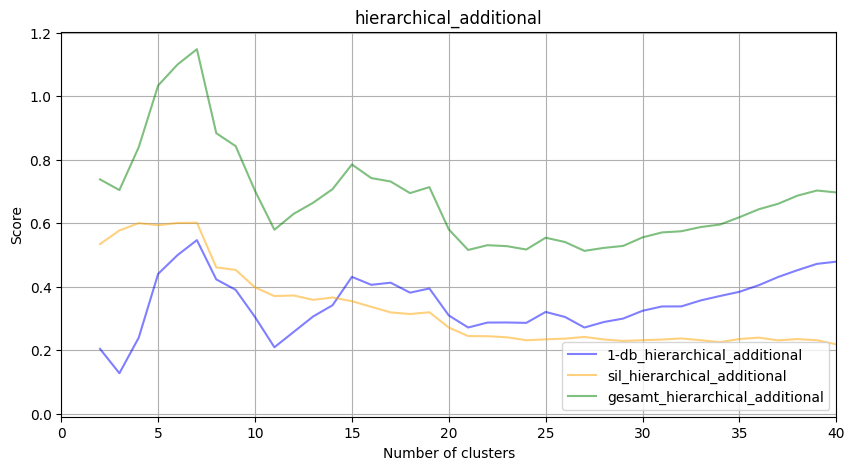

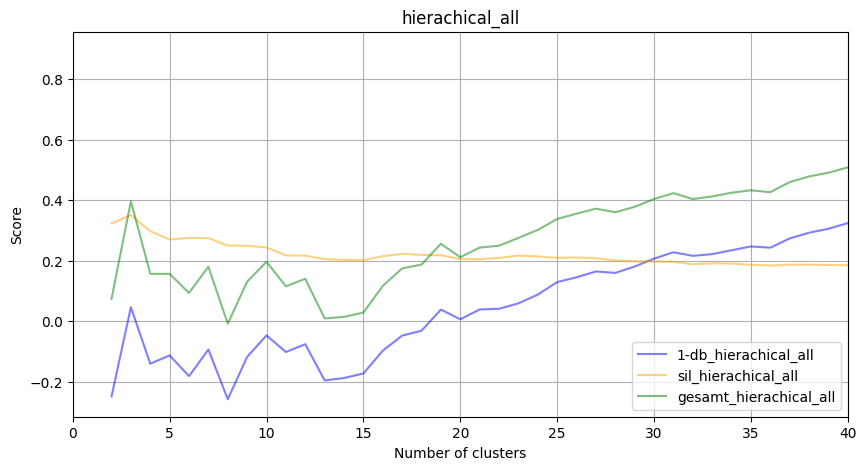

In [106]:
from matplotlib import ticker


def plot_scores(cluster_scores, cluster_option):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(cluster_scores['num_clusters'], 1-cluster_scores['davies_bouldin_score'], label='1-db_' + cluster_option, color='blue')
    ax.plot(cluster_scores['num_clusters'], cluster_scores['silhouette_score'], label='sil_' +  cluster_option, color='orange')
    ax.plot(cluster_scores['num_clusters'], -cluster_scores['davies_bouldin_score']+ 1 + cluster_scores['silhouette_score'], label='gesamt_' + cluster_option, color='green')
    ax.grid(True, which='both')
    #reduce x axis to0 to 20
    ax.set_xlim(0,40)

    #only show points not lines
    
      
    ax.set_title(cluster_option)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Score')
    #make graphs semi transparent
    for line in ax.get_lines():
        line.set_alpha(0.5)

    #show the legend in the lower right corner
    ax.legend(loc = 'lower right')
    plt.show()



plot_scores(cluster_scores_hierachical_basic, 'hierachical_basic')
plot_scores(cluster_scores_hierachical_additional, 'hierarchical_additional')
plot_scores(cluster_scores_hierachical_all, 'hierachical_all')


## Result:
- one can clearly see that between the rudimentary features and the additional ones there is no difference in the scores
- at 9 clusters a first local maxima is reached and after that the clustering does not get very much better


# Plotting best clusterScores

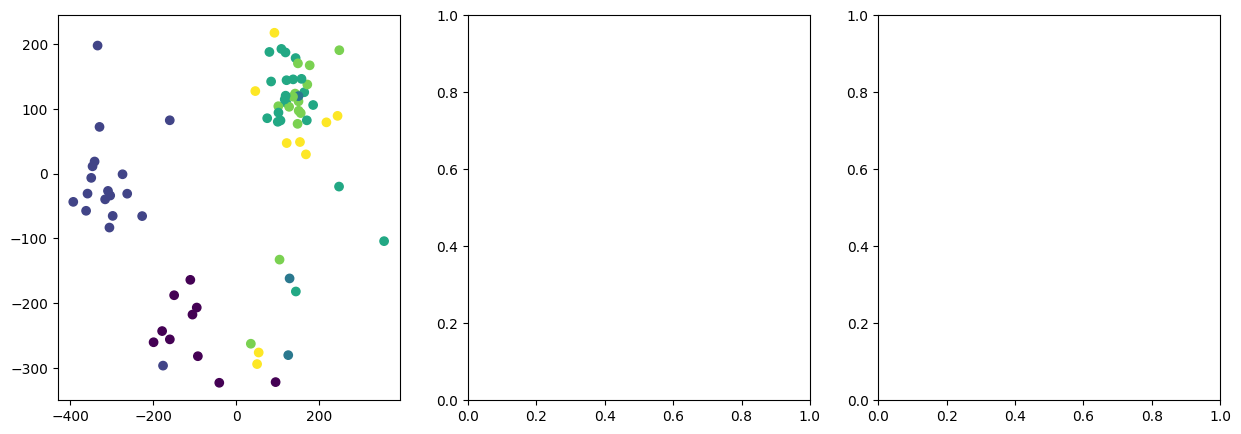

In [107]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(additional_mds_all_df['x_MDS'] , additional_mds_all_df['y_MDS'], c=cluster_labels_hierachical_all[str(6) + ' clusters'])

#create a list with the used colors in the plot ax1


## 3. Show clusters on the map


In [108]:
# show clusters on map 
#read in the data
locations_df = pd.read_csv("Data/stations_location.csv", sep=",")
#merge cluster labels with locations_df on Stationsnummer= Station_Nr
def merge_clusterlabels_map(cluster_labels):
    cluster_labels = pd.merge(cluster_labels, locations_df, left_on='Stationsnummer', right_on='Station_Nr')
    return cluster_labels
#plot the clusters with the locations of the stations

def plot_clusters_map( cluster_labels, num_clusters):

    fig, ax = plt.subplots(figsize=(7,5))
    # make the one plottet group red
    #only plot the clusters that have cluster labels set to 0
    cluster_labels.drop(cluster_labels['6 clusters'] == 1, inplace = True)


    ax.scatter(cluster_labels['From_Node_X'] , cluster_labels['From_Node_Y'], c=cluster_labels['6 clusters'] )
    
    ax.set_aspect('equal')
    #print name of each station to the point
    # for i, txt in enumerate(cluster_labels_kmeans_map['Station_Name']):
    #     ax.annotate(txt, (cluster_labels_kmeans_map['From_Node_X'][i], cluster_labels_kmeans_map['From_Node_Y'][i]))
    plt.show()

# for i in range(2,12):
#     plot_clusters_map(merge_clusterlabels_map(cluster_labels_hierachical_all), str(i))




((0.10588235294117647, 0.6196078431372549, 0.4666666666666667), (0.8509803921568627, 0.37254901960784315, 0.00784313725490196), (0.4588235294117647, 0.4392156862745098, 0.7019607843137254), (0.9058823529411765, 0.1607843137254902, 0.5411764705882353), (0.4, 0.6509803921568628, 0.11764705882352941), (0.9019607843137255, 0.6705882352941176, 0.00784313725490196), (0.6509803921568628, 0.4627450980392157, 0.11372549019607843), (0.4, 0.4, 0.4))


C:\Users\janzu\AppData\Local\Temp\ipykernel_24672\3162887591.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'], c = cmap(0))
C:\Users\janzu\AppData\Local\Temp\ipykernel_24672\3162887591.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'],c = cmap(1))
C:\Users\janzu\AppData\Local\Temp\ipykernel_24672\31628

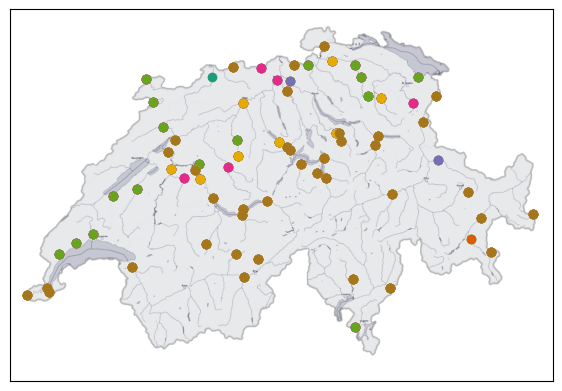

In [109]:
to_plot = merge_clusterlabels_map(cluster_labels_hierachical_additional)

fig, ax = plt.subplots(figsize=(7,5))
#insert a background image

#get the colors from matplotlib.colors set1 colormap

cmap = plt.get_cmap('Dark2')

#print the names of the colors
print(cmap.colors)

ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'], c = cmap(0))

to_plot.drop(to_plot[to_plot['7 clusters']>5].index, inplace=True)
ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'],c = cmap(1))

to_plot.drop(to_plot[to_plot['7 clusters']>4].index, inplace=True)
ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'],c = cmap(2))

to_plot.drop(to_plot[to_plot['7 clusters']>3].index, inplace=True)
ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'],c = cmap(3))

to_plot.drop(to_plot[to_plot['7 clusters']>2].index, inplace=True)
ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'],c = cmap(4))

to_plot.drop(to_plot[to_plot['7 clusters']>1].index, inplace=True)
ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'],c = cmap(5))

to_plot.drop(to_plot[to_plot['7 clusters']>0].index, inplace=True)
ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'],c = cmap(6))


img = plt.imread('images/map_rivers.png')
ax.imshow(img, extent=[485500, 834100, 64852, 297550])

#remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([]) 
ax.set_yticklabels([])
ax.set_xlim(475500, 844100)
ax.set_ylim(54852, 307550)


ax.set_aspect('equal')

((0.10588235294117647, 0.6196078431372549, 0.4666666666666667), (0.8509803921568627, 0.37254901960784315, 0.00784313725490196), (0.4588235294117647, 0.4392156862745098, 0.7019607843137254), (0.9058823529411765, 0.1607843137254902, 0.5411764705882353), (0.4, 0.6509803921568628, 0.11764705882352941), (0.9019607843137255, 0.6705882352941176, 0.00784313725490196), (0.6509803921568628, 0.4627450980392157, 0.11372549019607843), (0.4, 0.4, 0.4))


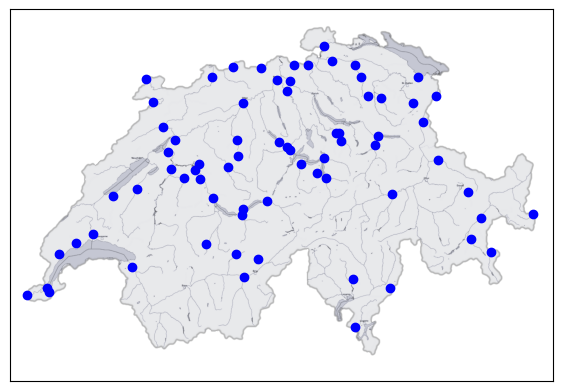

In [110]:
to_plot = merge_clusterlabels_map(cluster_labels_hierachical_additional)

fig, ax = plt.subplots(figsize=(7,5))
#insert a background image

#get the colors from matplotlib.colors set1 colormap

cmap = plt.get_cmap('Dark2')

#print the names of the colors
print(cmap.colors)

ax.scatter(to_plot['From_Node_X'] , to_plot['From_Node_Y'], c = 'blue')


img = plt.imread('images/map_rivers.png')
ax.imshow(img, extent=[485500, 834100, 64852, 297550])

#remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([]) 
ax.set_yticklabels([])
ax.set_xlim(475500, 844100)
ax.set_ylim(54852, 307550)


ax.set_aspect('equal')